In [10]:
from dotenv import load_dotenv
import sys

sys.path.append('AbbyUtils.py')
load_dotenv()

True

In [11]:
from langchain.tools import tool
from typing import List, Dict, Annotated
from langchain_experimental.utilities import PythonREPL
from AbbyUtils import fetch_google_news

@tool
def search_news(query: str) -> List[Dict[str, str]]:
    """Search Google News by input keyword"""
    news_tool = fetch_google_news(query, 5)
    return news_tool

@tool
def python_repl_tool(
    code: Annotated[str, "The python code to execute to generate your chart."],
):
    """Use this to execute python code. If you want to see the output of a value,
    you should print it out with `print(...)`. This is visible to the user."""
    result = ""
    try:
        result = PythonREPL().run(code)
    except BaseException as e:
        print(f"Failed to execute. Error: {repr(e)}")
    finally:
        return result

print(f"tool name: {search_news.name}")
print(f"tool description: {search_news.description}")
print(f"tool name: {python_repl_tool.name}")
print(f"tool description: {python_repl_tool.description}")

tool name: search_news
tool description: Search Google News by input keyword
tool name: python_repl_tool
tool description: Use this to execute python code. If you want to see the output of a value,
    you should print it out with `print(...)`. This is visible to the user.


In [12]:
#Define Tools
tools = [search_news, python_repl_tool]

# Agent prompt creation
1. chat_history
2. agent_scratchpad
3. input

In [13]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages(
    [
        ("system",
            "You are a helpful assistant. "
            "Make sure to use the `search_news` tool for searching keyword related news.",
        ),
        ("placeholder","{chat_history}"),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}"),         
        
    ]
)


# Agent Generation

In [14]:
from langchain_openai import ChatOpenAI
from langchain.agents import create_tool_calling_agent

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

agent = create_tool_calling_agent(llm, tools, prompt)



# AgentExecutor

Main Attributes

1. agent: plan and execute tools
2. tools: list of tools
3. return_intermediate_steps: 
4. max_iterations: Max Loop
5. max_execution_time
6. early_stopping_method

Main Methods

1. invoke: execute agent 
2. stream: 

In [15]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(
    agent = agent,
    tools = tools,
    verbose = True,
    max_iterations= 10,
    max_execution_time= 10,
    handle_parsing_errors= True,
)

# Check Step-by-Step Results with Stream Output

We will use the `stream()` method of AgentExecutor to stream the intermediate steps of the agent.

The output of `stream()` will alternate between (Action, Observation) pairs, and finally, if the agent has achieved its goal, it will end with an answer.

It will look like this:

1. Action output
2. Observation output
3. Action output
4. Observation output

... (continue until the goal is achieved) ...

Then, once the final goal is achieved, the agent will output the final answer.

The contents of these outputs are summarized as follows:

| Output | Content |
|--------|----------|

# Check Step-by-Step Results with Stream Output

We will use the `stream()` method of AgentExecutor to stream the intermediate steps of the agent.

The output of `stream()` will alternate between (Action, Observation) pairs, and finally, if the agent has achieved its goal, it will end with an answer.

It will look like this:

1. Action output
2. Observation output
3. Action output
4. Observation output

... (continue until the goal is achieved) ...

Then, once the final goal is achieved, the agent will output the final answer.

The contents of these outputs are summarized as follows:

| Output | Content |
|--------|----------|
| Action | `actions`: AgentAction or its subclasses<br>`messages`: Chat messages corresponding to the action call |
| Observation | `steps`: A record of the agent's actions and observations so far<br>`messages`: Chat messages including the result of the function call (i.e., observation) |
| Final Answer | `output`: AgentFinish<br>`messages`: Chat messages including the final output |
| Action | `actions`: AgentAction 또는 그 하위 클래스<br>`messages`: 액션 호출에 해당하는 채팅 메시지 |
| Observation | `steps`: 현재 액션과 그 관찰을 포함한 에이전트가 지금까지 수행한 작업의 기록<br>`messages`: 함수 호출 결과(즉, 관찰)를 포함한 채팅 메시지 |
| Final Answer | `output`: AgentFinish<br>`messages`: 최종 출력을 포함한 채팅 메시지 |
```


In [20]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(

    agent = agent,
    tools = tools,
    verbose = False,
    handle_parsing_errors= True,
)


In [21]:
result = agent_executor.stream({"input": "search news about city of abbotsford"})
for step in result:
    print(step)
    print("===" * 20)

{'actions': [ToolAgentAction(tool='search_news', tool_input={'query': 'city of abbotsford'}, log="\nInvoking: `search_news` with `{'query': 'city of abbotsford'}`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_yeMLHUl60T25UUKosWovsTu4', 'function': {'arguments': '{"query":"city of abbotsford"}', 'name': 'search_news'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306'}, id='run-90b0c171-dba7-4362-8ffc-9b08d2f55ad5', tool_calls=[{'name': 'search_news', 'args': {'query': 'city of abbotsford'}, 'id': 'call_yeMLHUl60T25UUKosWovsTu4', 'type': 'tool_call'}], tool_call_chunks=[{'name': 'search_news', 'args': '{"query":"city of abbotsford"}', 'id': 'call_yeMLHUl60T25UUKosWovsTu4', 'index': 0, 'type': 'tool_call_chunk'}])], tool_call_id='call_yeMLHUl60T25UUKosWovsTu4')], 'messages': [AIMessageChunk(content='', additional_kwargs={'tool_c

In [22]:
from AbbyUtils import AgentStreamParser

agent_stream_parser = AgentStreamParser()

Python REPL can execute arbitrary code. Use with caution.


[도구 호출]
Tool: python_repl_tool
code: import matplotlib.pyplot as plt
import numpy as np

# Sample data: years and corresponding population
years = np.array([2000, 2005, 2010, 2015, 2020, 2023])
population = np.array([500000, 550000, 600000, 650000, 700000, 720000])

# Create a plot
plt.figure(figsize=(10, 5))
plt.plot(years, population, marker='o')
plt.title('Population Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.xticks(years)
plt.yticks(np.arange(500000, 800001, 50000))
plt.show()
Log: 
Invoking: `python_repl_tool` with `{'code': "import matplotlib.pyplot as plt\nimport numpy as np\n\n# Sample data: years and corresponding population\nyears = np.array([2000, 2005, 2010, 2015, 2020, 2023])\npopulation = np.array([500000, 550000, 600000, 650000, 700000, 720000])\n\n# Create a plot\nplt.figure(figsize=(10, 5))\nplt.plot(years, population, marker='o')\nplt.title('Population Growth Over Time')\nplt.xlabel('Year')\nplt.ylabel('Population')\nplt.grid(Tru

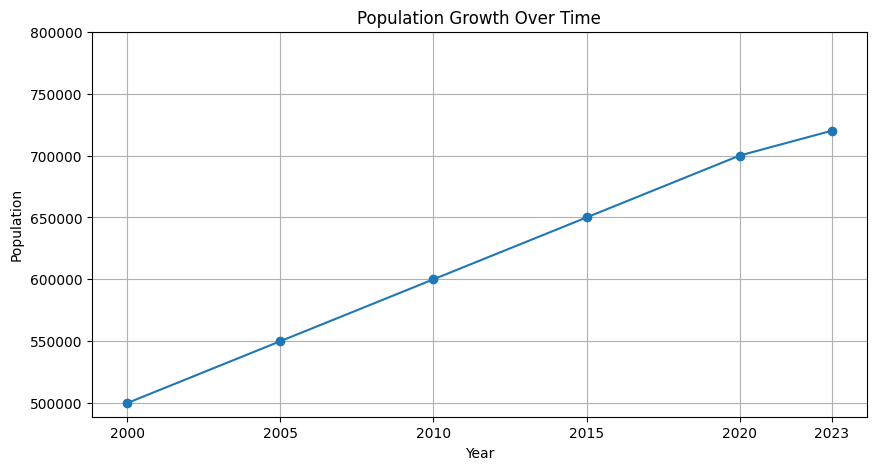

[관찰 내용]
Observation: 
[최종 답변]
The graph of the population growth over time has been plotted successfully. It shows the increase in the number of people in a city from the year 2000 to 2023. If you have any specific requests or need further modifications, feel free to ask!


In [23]:
result = agent_executor.stream(
    {"input": "using matplotlib to plot a graph of the number of people in a city over time and excute it"}
)

for step in result:

    agent_stream_parser.process_agent_steps(step)

In [ ]:
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

store ={}

def get_session_history(session_ids):
    if session_ids not in store:
        store[session_ids] = ChatMessageHistory()
    return store[session_ids]

agent_with_chat_history = RunnableWithMessageHistory(
    agent_executor,
    get_session_history,
    input_messages_key= "input",
    history_messages_key= "chat_history",
)
